# LIMITS OF A FUNCTION
The concept of `limits of a function` is fundamental to the study of Calculus. Limits allow mathematicians to do `differentiation` a useful concepts that allows companies and individuals to maximize profit, among other things. The limits of a function give information about the behaviour of a function output values around a specified point in the domain of the function. However, for most students this concept is introduced in an intimidating and very abstract manner which causes frustration and eventually affects their understanding of subsequent concepts in the study of Calculus.


This project seeks to bridge the gap between the abstract nature of mathematics and the study of the subject in a visually enabling manner. It provides functionality that enables users to clearly visualize the behaviour of the function to aid them in their study of limits.
<!-- Give an introduction here -->
### WHAT IS A LIMIT OF A FUNCTION?
Let $A, B \subseteq \mathbb{R}$ and consider a function $$f:A \to B$$ 
The limit $L$ of $f$ around $a \in A$ is a value that describes how the function's output values behave as the input values approach $a$ from either the left or the right. In simpler terms it tells us the value that $f(x)$ gets arbitrarily close to as $x$ approaches $a.$
## PURPOSE OF PROJECT
## SCOPE OF PROJECT <!--The functionality and attributes it provides-->



In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from typing import Union

In [2]:
class Limit:
    def __init__(self, fun, limit_point:Union[float, int]):
        self.fun = fun
        self.limit = limit_point
        self.x = np.linspace(self.limit-2, self.limit+2, 101)
        self.y = self.fun(self.x)
        self.left_x = None
        self.left_y = None
        self.right_x = None
        self.right_y= None

    def create_none(self):
        left_x = np.linspace(self.limit-5, self.limit-(10**(-1.5)))
        left_y = self.fun(left_x)
        right_x = np.linspace(self.limit+5, self.limit+(10**(-1.5)))
        right_x = np.array(right_x)
        right_y = self.fun(right_x)
        return left_x, left_y, right_x, right_y
    
    def update_none(self):
        self.left_x, self.left_y, self.right_x, self.right_y = self.create_none()

    def draw(self):
        self.update_none()
        plt.plot(self.x, self.y)
        plt.grid()
        plt.show()

    def anim(self):
        self.update_none()
        fig, ax = plt.subplots()
        leftline, = ax.plot([], [], 'o', markersize=5, color='red')
        rightline, = ax.plot([], [], 'o', markersize=5, color='blue')


        def update_data(i):
            try:
                leftline.set_data(self.left_x[i:i+1], self.left_y[i:i+1])
                rightline.set_data(self.right_x[i:i+1], self.right_y[i:i+1])
            except IndexError:
                pass
            return leftline, rightline

        self.draw()
        ani = FuncAnimation(
                    fig=fig, 
                    func = update_data, 
                    frames=len(self.left_x), 
                    interval=25, 
                    )
        
        ani.save("function.mp4")
        
        plt.show()

    def is_defined(self):
        try:
            self.fun(self.limit)
            return self.fun(self.limit)
        except:
            return False

    def solve_left(self):
        left_x = [self.limit-(10**(-n)) for n in range(1, 1000)]
        left_x = np.array(left_x)
        left_y = self.fun(left_x)
        left_y = left_y[~np.isnan(left_y)]
        is_converge = [current - previous for current, previous in zip(left_y, left_y[1:])]
        tolerance = [(current - previous)<0.01 for current, previous in zip(is_converge, is_converge[1:])]
        if all(tolerance[5:]):
            return left_y
        return None
    
    def solve_right(self):
        right_x = [self.limit+(10**(-n)) for n in range(1,1000)]
        right_x = np.array(right_x)
        right_y = self.fun(right_x)
        right_y = right_y[~np.isnan(right_y)]
        is_converge = [future - current for future, current in zip(right_y[1:], right_y)]
        tolerance = [(future-current)<0.01 for future, current in zip(is_converge[1:], is_converge)]
        if all(tolerance[5:]):
            return right_y
        return None

    def guess(self):
        if self.solve_right() is not None and self.solve_left() is not None\
              and self.solve_right()[-1] == self.solve_left()[-1]:
            return self.solve_left()[-1]
        return None

    def get_delta(self, epsilon:Union[float, int], limit_value:Union[float, int]):
        domain_codomain = list(zip(self.x, self.y))
        if epsilon<=0:
            raise ValueError('`epsilon` value should be a nonzero positive number')
        for _, y in domain_codomain.copy():
            if abs(y-limit_value)>epsilon:
                domain_codomain.remove((_,y))
        domain_difference = [abs(x-self.limit)+epsilon if abs(x-self.limit)==0 else abs(x-self.limit) for x,_ in domain_codomain ]
        try:
            return min(domain_difference)
        except:
            return None
        
    def solve_epsilon(self):
        epsilon_values = np.random.random(10)
        if self.guess() != None and self.get_delta(epsilon_values[0], self.guess()):
            delta_values = [self.get_delta(i, self.guess())for i in epsilon_values]
            return self.guess() if len(delta_values)==len(epsilon_values) else None
    

/tmp/ipykernel_704303/2836014051.py:1: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: (1/x)+(2/x**2)


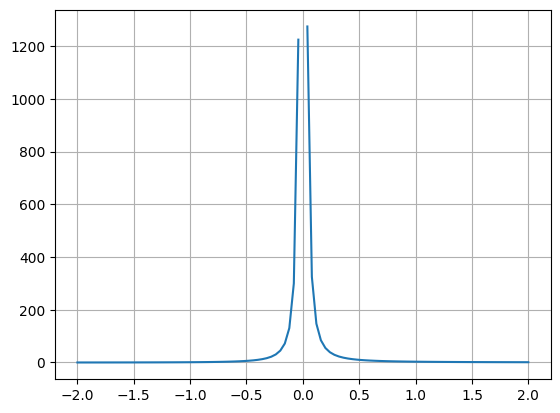

In [5]:
f = lambda x: (1/x)+(2/x**2)
test_limit = Limit(f, 0)

test_limit.anim()